<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Predicting House Prices in Ames

## 1. Recap from Notebook 1

To recap, this analysis aims to develop a regression model to forecast Ames home prices and identify the most influential factors. There are 2 datasets, train and test. Data cleaning and visualization have been covered in Notebook 1. Based on the EDA, area, quality and age of the house have a strong correlation with the housing prices. The below features are identified for modeling consideration:

|Feature | Description |
|:-------------------|:---------------------|
|total area |living + total bsmt + garage area in square feet|
|overall qc |Rates the overall material and finish of the house|
|living area|Living area square feet|
|1st flr area|First Floor square feet|
|garage area|Size of garage in square feet|
|garage cars|Size of garage in car capacity|
|garage finish|Interior finish of the garage|
|bsmt qc|Evaluates the height of the basement|
|yr bulit|Original construction date|
|yr remod/add|Remodel date (same as construction date if no remodeling or additions)|
|fireplace qc|Fireplace quality|
|full bath|Full bathrooms above grade|
|totalrm abvgrd|Total rooms above grade (does not include bathrooms)|
|cond 2|Proximity to various conditions (if more than one is present)|
|building type|Type of dwelling|
|foundation|Type of foundation|
|functionality|Home functionality|
|age|Year built - Year sold|


## 2. Importing Python Modules

In [1]:
# Import the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style='whitegrid') # set theme to be whitegrid

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV , RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

## 3. Load the Dataset

In [2]:
# Read the csv files
df_train_clean = pd.read_csv('../datasets/df_train_clean.csv', keep_default_na=False, na_values="")
df_test_clean = pd.read_csv('../datasets/df_test_clean.csv', keep_default_na=False, na_values="")

**Datasets:**
- df_train_clean.csv (contains cleaned training data for the model)
- df_test_clean.csv (contains cleaned data for the model)

In [3]:
# Set the max display for the columns and rows
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 50)

In [4]:
# Display the first 5 rows for df_train
df_train_clean.head()

id        pid                      ms subclass ms zoning  lot frontage  \
0  109  533352170             2-Story 1946 & Newer        RL          68.0   
1  544  531379050             2-Story 1946 & Newer        RL          43.0   
2  153  535304180  1-Story 1946 & Newer All Styles        RL          68.0   
3  318  916386060             2-Story 1946 & Newer        RL          73.0   
4  255  906425045    1-1/2 Story Finished All Ages        RL          82.0   

   lot area street alley  lot shape land contour  utilities lot config  \
0     13517   Pave    NA          2          Lvl          3    CulDSac   
1     11492   Pave    NA          2          Lvl          3    CulDSac   
2      7922   Pave    NA          3          Lvl          3     Inside   
3      9802   Pave    NA          3          Lvl          3     Inside   
4     14235   Pave    NA          2          Lvl          3     Inside   

   land slope neighborhood cond 1 cond 2 bldg type house style  overall qc  \
0           2       Sawyer   RRAe   Norm      1Fam      2Story           6   
1           2      SawyerW   Norm   Norm      1Fam      2Story           7   
2           2        NAmes   Norm   Norm      1Fam      1Story           5   
3           2       Timber   Norm   Norm      1Fam      2Story           5   
4           2      SawyerW   Norm   Norm      1Fam      1.5Fin           6   

   overall cond  yr built  yr remod/add roof style roof matl exter 1st  \
0             8      1976          2005      Gable   CompShg   HdBoard   
1             5      1996          1997      Gable   CompShg   VinylSd   
2             7      1953          2007      Gable   CompShg   VinylSd   
3             5      2006          2007      Gable   CompShg   VinylSd   
4             8      1900          1993      Gable   CompShg   Wd Sdng   

  exter 2nd mas vnr type  exter qc  exter cond foundation  bsmt qc  bsmt cond  \
0   Plywood      BrkFace         7           5     CBlock        5          5   
1   VinylSd      BrkFace         7           5      PConc        7          5   
2   VinylSd         None         5           7     CBlock        5          5   
3   VinylSd         None         5           5      PConc        7          5   
4   Plywood         None         5           5      PConc        3          7   

   bsmt exposure  bsmtfin type 1  bsmtfin type 2  bsmt unf area  \
0              1               6               1          192.0   
1              1               6               1          276.0   
2              1               6               1          326.0   
3              1               1               1          384.0   
4              1               1               1          676.0   

   total bsmt area heating  heating qc central air  electrical  1st flr area  \
0            725.0    GasA           9           Y           4           725   
1            913.0    GasA           9           Y           4           913   
2           1057.0    GasA           5           Y           4          1057   
3            384.0    GasA           7           Y           4           744   
4            676.0    GasA           5           Y           4           831   

   living area  bsmt full bath  bsmt half bath  full bath  half bath  \
0         1479             0.0             0.0          2          1   
1         2122             1.0             0.0          2          1   
2         1057             1.0             0.0          1          0   
3         1444             0.0             0.0          2          1   
4         1445             0.0             0.0          2          0   

   bedroom abvgr  kitchen abvgr  kitchen qc  totrms abvgrd  functional  \
0              3              1           7              6           7   
1              4              1           7              8           7   
2              3              1           7              5           7   
3              3              1           5              7           7   
4 

In [5]:
# Display the first 5 rows for df_test
df_test_clean.head()

id        pid  ms subclass ms zoning  lot frontage  lot area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL          68.0      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL          68.0      9500   Pave   

  alley  lot shape land contour  utilities lot config  land slope  \
0  Grvl          3          Lvl          3     Inside           2   
1    NA          2          Lvl          3     Inside           2   
2    NA          2          Lvl          3     Inside           2   
3    NA          3          Lvl          3     Inside           2   
4    NA          2          Lvl          3     Inside           2   

  neighborhood cond 1 cond 2 bldg type house style  overall qc  overall cond  \
0      OldTown   Norm   Norm    2fmCon      2Story           6             8   
1       Sawyer   Norm   Norm    Duplex      1Story           5             4   
2      Gilbert   Norm   Norm      1Fam      2Story           7             5   
3      OldTown   Norm   Norm      1Fam      1Story           5             6   
4        NAmes   Norm   Norm      1Fam      1Story           6             5   

   yr built  yr remod/add roof style roof matl exter 1st exter 2nd  \
0      1910          1950      Gable   CompShg   AsbShng   AsbShng   
1      1977          1977      Gable   CompShg   Plywood   Plywood   
2      2006          2006      Gable   CompShg   VinylSd   VinylSd   
3      1923          2006      Gable   CompShg   Wd Sdng   Wd Sdng   
4      1963          1963      Gable   CompShg   Plywood   Plywood   

  mas vnr type  exter qc  exter cond foundation  bsmt qc  bsmt cond  \
0         None         5           3      Stone        3          5   
1         None         5           5     CBlock        7          5   
2         None         7           5      PConc        7          7   
3         None         7           5     CBlock        5          5   
4      BrkFace         5           5     CBlock        7          5   

   bsmt exposure  bsmtfin type 1  bsmtfin type 2  bsmt unf area  \
0              1               1               1           1020   
1              1               1               1           1967   
2              3               6               1            100   
3              1               1               1            968   
4              1               4               1            785   

   total bsmt area heating  heating qc central air  electrical  1st flr area  \
0             1020    GasA           7           N           1           908   
1             1967    GasA           5           Y           4          1967   
2              654    GasA           9           Y           4           664   
3              968    GasA           5           Y           4           968   
4             1394    GasA           7           Y           4          1394   

   living area  bsmt full bath  bsmt half bath  full bath  half bath  \
0         1928               0               0          2          0   
1         1967               0               0          2          0   
2         1496               1               0          2          1   
3          968               0               0          1          0   
4         1394               1               0          1          1   

   bedroom abvgr  kitchen abvgr  kitchen qc  totrms abvgrd  functional  \
0              4              2           3              9           7   
1              6              2           5             10           7   
2              3              1           7              7           7   
3              2              1           5              5           7   
4              3              1           5              6           7   

   fireplaces  fireplace qc  garage type  

In [6]:
# Check the shape and size for df_train and df_test
print('Train data shape:', df_train_clean.shape)
print('Test data shape:', df_test_clean.shape)

Train data shape: (2018, 72)
Test data shape: (878, 70)


In [7]:
# Confirm no missing values for df_train
df_train_clean.isnull().sum().sort_values(ascending=False)

id               0
pid              0
fireplaces       0
functional       0
totrms abvgrd    0
                ..
roof matl        0
roof style       0
yr remod/add     0
yr built         0
total area       0
Length: 72, dtype: int64

In [8]:
# Confirm no missing values for df_test
df_test_clean.isnull().sum().sort_values(ascending=False)

id                0
bsmt half bath    0
totrms abvgrd     0
kitchen qc        0
kitchen abvgr     0
                 ..
foundation        0
bsmt qc           0
bsmt cond         0
bsmt exposure     0
total area        0
Length: 70, dtype: int64

- The clean datasets obtained from the EDA imported confirmed no errors.

## 4. Feature Selection

Among the identified features, a few may be related (e.g. age, year built, year remod/add) so we may not select all the above features. After reviewing, we will try out the below features:

- living area
- total bsmt area
- garage area
- kitchen qc
- fireplace qc
- bsmt qc
- garage qc
- exter qc
- garage finish
- functional
- cond 2
- foundation
- bldg type
- total bathroom
- age

Total bathroom and age are added features to reduce the multicollinearly among the variables.

In [9]:
# Create new column for total bathroom to reduce the multicollinearly for df_train
df_train_clean['total bathroom'] = df_train_clean['full bath'] + df_train_clean['bsmt full bath'] + 0.5 * (df_train_clean['half bath'] + df_train_clean['bsmt full bath'])

In [10]:
df_train_clean.head()

id        pid                      ms subclass ms zoning  lot frontage  \
0  109  533352170             2-Story 1946 & Newer        RL          68.0   
1  544  531379050             2-Story 1946 & Newer        RL          43.0   
2  153  535304180  1-Story 1946 & Newer All Styles        RL          68.0   
3  318  916386060             2-Story 1946 & Newer        RL          73.0   
4  255  906425045    1-1/2 Story Finished All Ages        RL          82.0   

   lot area street alley  lot shape land contour  utilities lot config  \
0     13517   Pave    NA          2          Lvl          3    CulDSac   
1     11492   Pave    NA          2          Lvl          3    CulDSac   
2      7922   Pave    NA          3          Lvl          3     Inside   
3      9802   Pave    NA          3          Lvl          3     Inside   
4     14235   Pave    NA          2          Lvl          3     Inside   

   land slope neighborhood cond 1 cond 2 bldg type house style  overall qc  \
0           2       Sawyer   RRAe   Norm      1Fam      2Story           6   
1           2      SawyerW   Norm   Norm      1Fam      2Story           7   
2           2        NAmes   Norm   Norm      1Fam      1Story           5   
3           2       Timber   Norm   Norm      1Fam      2Story           5   
4           2      SawyerW   Norm   Norm      1Fam      1.5Fin           6   

   overall cond  yr built  yr remod/add roof style roof matl exter 1st  \
0             8      1976          2005      Gable   CompShg   HdBoard   
1             5      1996          1997      Gable   CompShg   VinylSd   
2             7      1953          2007      Gable   CompShg   VinylSd   
3             5      2006          2007      Gable   CompShg   VinylSd   
4             8      1900          1993      Gable   CompShg   Wd Sdng   

  exter 2nd mas vnr type  exter qc  exter cond foundation  bsmt qc  bsmt cond  \
0   Plywood      BrkFace         7           5     CBlock        5          5   
1   VinylSd      BrkFace         7           5      PConc        7          5   
2   VinylSd         None         5           7     CBlock        5          5   
3   VinylSd         None         5           5      PConc        7          5   
4   Plywood         None         5           5      PConc        3          7   

   bsmt exposure  bsmtfin type 1  bsmtfin type 2  bsmt unf area  \
0              1               6               1          192.0   
1              1               6               1          276.0   
2              1               6               1          326.0   
3              1               1               1          384.0   
4              1               1               1          676.0   

   total bsmt area heating  heating qc central air  electrical  1st flr area  \
0            725.0    GasA           9           Y           4           725   
1            913.0    GasA           9           Y           4           913   
2           1057.0    GasA           5           Y           4          1057   
3            384.0    GasA           7           Y           4           744   
4            676.0    GasA           5           Y           4           831   

   living area  bsmt full bath  bsmt half bath  full bath  half bath  \
0         1479             0.0             0.0          2          1   
1         2122             1.0             0.0          2          1   
2         1057             1.0             0.0          1          0   
3         1444             0.0             0.0          2          1   
4         1445             0.0             0.0          2          0   

   bedroom abvgr  kitchen abvgr  kitchen qc  totrms abvgrd  functional  \
0              3              1           7              6           7   
1              4              1           7              8           7   
2              3              1           7              5           7   
3              3              1           5              7           7   
4 

In [11]:
df_train_clean.columns

Index(['id', 'pid', 'ms subclass', 'ms zoning', 'lot frontage', 'lot area',
       'street', 'alley', 'lot shape', 'land contour', 'utilities',
       'lot config', 'land slope', 'neighborhood', 'cond 1', 'cond 2',
       'bldg type', 'house style', 'overall qc', 'overall cond', 'yr built',
       'yr remod/add', 'roof style', 'roof matl', 'exter 1st', 'exter 2nd',
       'mas vnr type', 'exter qc', 'exter cond', 'foundation', 'bsmt qc',
       'bsmt cond', 'bsmt exposure', 'bsmtfin type 1', 'bsmtfin type 2',
       'bsmt unf area', 'total bsmt area', 'heating', 'heating qc',
       'central air', 'electrical', '1st flr area', 'living area',
       'bsmt full bath', 'bsmt half bath', 'full bath', 'half bath',
       'bedroom abvgr', 'kitchen abvgr', 'kitchen qc', 'totrms abvgrd',
       'functional', 'fireplaces', 'fireplace qc', 'garage type',
       'garage yr blt', 'garage finish', 'garage cars', 'garage area',
       'garage qc', 'garage cond', 'paved drive', 'pool qc', 'fence',
  

In [12]:
# Select the features to model
features = df_train_clean.loc[:, ['saleprice','log saleprice', 'living area', 'total bsmt area', 'garage area',
                                  'kitchen qc', 'fireplace qc', 'bsmt qc', 'garage qc', 'exter qc',
                                  'overall qc', 'garage finish', 'functional', 'cond 2', 'foundation', 
                                  'bldg type', 'total bathroom', 'age']]
features.head()

saleprice  log saleprice  living area  total bsmt area  garage area  \
0     130500      11.779129         1479            725.0        475.0   
1     220000      12.301383         2122            913.0        559.0   
2     109000      11.599103         1057           1057.0        246.0   
3     174000      12.066811         1444            384.0        400.0   
4     138500      11.838626         1445            676.0        484.0   

   kitchen qc  fireplace qc  bsmt qc  garage qc  exter qc  overall qc  \
0           7             0        5          5         7           6   
1           7             5        7          5         7           7   
2           7             0        5          5         5           5   
3           5             0        7          5         5           5   
4           5             0        3          5         5           6   

   garage finish  functional cond 2 foundation bldg type  total bathroom  age  
0              2           7   Norm     CBlock      1Fam             2.5   34  
1              2           7   Norm      PConc      1Fam             4.0   13  
2              1           7   Norm     CBlock      1Fam             2.5   57  
3              3           7   Norm      PConc      1Fam             2.5    4  
4              1           7   Norm      PConc      1Fam             2.0  110

In [13]:
# Perform get dummies for categorical features for df_train
df_train_dummies = pd.get_dummies(features, columns = ['cond 2', 'foundation', 'bldg type'], drop_first = True)
df_train_dummies.head(3)

saleprice  log saleprice  living area  total bsmt area  garage area  \
0     130500      11.779129         1479            725.0        475.0   
1     220000      12.301383         2122            913.0        559.0   
2     109000      11.599103         1057           1057.0        246.0   

   kitchen qc  fireplace qc  bsmt qc  garage qc  exter qc  overall qc  \
0           7             0        5          5         7           6   
1           7             5        7          5         7           7   
2           7             0        5          5         5           5   

   garage finish  functional  total bathroom  age  cond 2_Feedr  cond 2_Norm  \
0              2           7             2.5   34             0            1   
1              2           7             4.0   13             0            1   
2              1           7             2.5   57             0            1   

   cond 2_PosA  cond 2_PosN  cond 2_RRAe  cond 2_RRAn  cond 2_RRNn  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   

   foundation_CBlock  foundation_PConc  foundation_Slab  foundation_Stone  \
0                  1                 0                0                 0   
1                  0                 1                0                 0   
2                  1                 0                0                 0   

   foundation_Wood  bldg type_2fmCon  bldg type_Duplex  bldg type_Twnhs  \
0                0                 0                 0                0   
1                0                 0                 0                0   
2                0                 0                 0                0   

   bldg type_TwnhsE  
0                 0  
1                 0  
2                 0

In [14]:
df_train_dummies.shape

(2018, 31)

In [15]:
# Create new column for total bathroom in df_test
df_test_clean['total bathroom'] = df_test_clean['full bath'] + df_test_clean['bsmt full bath'] + 0.5 * (df_test_clean['half bath'] + df_test_clean['bsmt full bath'])

In [16]:
df_test_clean = df_test_clean.loc[:, ['id', 'living area', 'total bsmt area', 'garage area',
                                  'kitchen qc', 'fireplace qc', 'bsmt qc', 'garage qc', 'exter qc',
                                  'overall qc', 'garage finish', 'functional', 'cond 2', 'foundation', 
                                  'bldg type', 'total bathroom', 'age']]
df_test_clean.head(3)

id  living area  total bsmt area  garage area  kitchen qc  fireplace qc  \
0  2658         1928             1020          440           3             0   
1  2718         1967             1967          580           5             0   
2  2414         1496              654          426           7             7   

   bsmt qc  garage qc  exter qc  overall qc  garage finish  functional cond 2  \
0        3          2         5           6              1           7   Norm   
1        7          5         5           5              3           7   Norm   
2        7          5         7           7              2           7   Norm   

  foundation bldg type  total bathroom  age  
0      Stone    2fmCon             2.0   96  
1     CBlock    Duplex             2.0   29  
2      PConc      1Fam             4.0    0

In [17]:
# Perform get dummies for categorical features for df_test
df_test = pd.get_dummies(df_test_clean, columns = ['cond 2', 'foundation', 'bldg type'], drop_first = True)
df_test.head(3)

id  living area  total bsmt area  garage area  kitchen qc  fireplace qc  \
0  2658         1928             1020          440           3             0   
1  2718         1967             1967          580           5             0   
2  2414         1496              654          426           7             7   

   bsmt qc  garage qc  exter qc  overall qc  garage finish  functional  \
0        3          2         5           6              1           7   
1        7          5         5           5              3           7   
2        7          5         7           7              2           7   

   total bathroom  age  cond 2_Norm  cond 2_PosA  foundation_CBlock  \
0             2.0   96            1            0                  0   
1             2.0   29            1            0                  1   
2             4.0    0            1            0                  0   

   foundation_PConc  foundation_Slab  foundation_Stone  foundation_Wood  \
0                 0                0                 1                0   
1                 0                0                 0                0   
2                 1                0                 0                0   

   bldg type_2fmCon  bldg type_Duplex  bldg type_Twnhs  bldg type_TwnhsE  
0                 1                 0                0                 0  
1                 0                 1                0                 0  
2                 0                 0                0                 0

In [18]:
# Check the newly added get dummies columns for df_train
cat_col_train = df_train_dummies.select_dtypes(include=['uint8']).columns.tolist()
print(cat_col_train)

['cond 2_Feedr', 'cond 2_Norm', 'cond 2_PosA', 'cond 2_PosN', 'cond 2_RRAe', 'cond 2_RRAn', 'cond 2_RRNn', 'foundation_CBlock', 'foundation_PConc', 'foundation_Slab', 'foundation_Stone', 'foundation_Wood', 'bldg type_2fmCon', 'bldg type_Duplex', 'bldg type_Twnhs', 'bldg type_TwnhsE']


In [19]:
# Check the newly added get dummies columns for df_test
cat_col_test = df_test.select_dtypes(include=['uint8']).columns.tolist()
print(cat_col_test)

['cond 2_Norm', 'cond 2_PosA', 'foundation_CBlock', 'foundation_PConc', 'foundation_Slab', 'foundation_Stone', 'foundation_Wood', 'bldg type_2fmCon', 'bldg type_Duplex', 'bldg type_Twnhs', 'bldg type_TwnhsE']


In [20]:
# Drop columns not in df_test for df_train dummies
df_train_dummies.drop(['cond 2_Feedr', 'cond 2_PosN', 'cond 2_RRAe', 'cond 2_RRAn', 'cond 2_RRNn',], axis=1, inplace=True)

In [21]:
df_train_dummies.shape

(2018, 26)

In [22]:
df_test.shape

(878, 25)

In [23]:
# Reset index to be 'id' 
df_test = df_test.set_index('id')

In [24]:
df_test.head(3)

living area  total bsmt area  garage area  kitchen qc  fireplace qc  \
id                                                                          
2658         1928             1020          440           3             0   
2718         1967             1967          580           5             0   
2414         1496              654          426           7             7   

      bsmt qc  garage qc  exter qc  overall qc  garage finish  functional  \
id                                                                          
2658        3          2         5           6              1           7   
2718        7          5         5           5              3           7   
2414        7          5         7           7              2           7   

      total bathroom  age  cond 2_Norm  cond 2_PosA  foundation_CBlock  \
id                                                                       
2658             2.0   96            1            0                  0   
2718             2.0   29            1            0                  1   
2414             4.0    0            1            0                  0   

      foundation_PConc  foundation_Slab  foundation_Stone  foundation_Wood  \
id                                                                           
2658                 0                0                 1                0   
2718                 0                0                 0                0   
2414                 1                0                 0                0   

      bldg type_2fmCon  bldg type_Duplex  bldg type_Twnhs  bldg type_TwnhsE  
id                                                                           
2658                 1                 0                0                 0  
2718                 0                 1                0                 0  
2414                 0                 0                0                 0

In [25]:
df_test.shape

(878, 24)

In [26]:
# Creating a correlation heatmap to check for new features added
df_train_sp_corr = df_train_dummies.corr()[['saleprice']].sort_values(by='saleprice', ascending = False)
df_train_sp_corr.head(15)

saleprice
saleprice          1.000000
log saleprice      0.945836
overall qc         0.803652
living area        0.721935
exter qc           0.714556
kitchen qc         0.692746
total bsmt area    0.670107
garage area        0.653895
bsmt qc            0.637314
total bathroom     0.589369
garage finish      0.559143
fireplace qc       0.539800
foundation_PConc   0.530256
garage qc          0.290972
functional         0.126793

- Total bathroom is observed to have a higher correlation (0.59) than Full bath alone (0.54). It is also noted foundation_PConc has a correlation >0.5 as well.
- 24 features will be used for the modeling.

In [27]:
df_train_dummies.columns

Index(['saleprice', 'log saleprice', 'living area', 'total bsmt area',
       'garage area', 'kitchen qc', 'fireplace qc', 'bsmt qc', 'garage qc',
       'exter qc', 'overall qc', 'garage finish', 'functional',
       'total bathroom', 'age', 'cond 2_Norm', 'cond 2_PosA',
       'foundation_CBlock', 'foundation_PConc', 'foundation_Slab',
       'foundation_Stone', 'foundation_Wood', 'bldg type_2fmCon',
       'bldg type_Duplex', 'bldg type_Twnhs', 'bldg type_TwnhsE'],
      dtype='object')

## 5. Scaling and Spliting Dataset

In [28]:
# Create X and y variables
X = df_train_dummies.drop(['saleprice', 'log saleprice'], axis = 1)
y = df_train_dummies['saleprice']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size = 0.2)

In [29]:
print(X_train.shape)
print(X_val.shape)

(1614, 24)
(404, 24)


In [30]:
print(y_train.shape)
print(y_val.shape)

(1614,)
(404,)


In [31]:
# Create an instance of the StandardScaler() object
scaler = StandardScaler()

# Fit the training set
scaler.fit(X_train)

# Apply transform to both the training set and the validation set
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

# Print scaled values for first row of data
print(X_train[:1, :])
print()
print(X_val[:1, :])

[[ 0.46280868  1.57888982  0.39048021  2.23064897  1.27755248  1.78367915
   0.26857135  2.72186554  2.05065814  0.32350279  0.22585778  1.11426666
  -1.18188402 -9.16227965 -0.0352235  -0.87182982  1.12979896 -0.13287015
  -0.04984448 -0.0352235  -0.14888226 -0.19818884 -0.20154145  3.46642886]]

[[ 1.81945427  0.49315925  1.78586904  0.73053754  1.27755248  0.6021244
   0.26857135  1.02241062  1.34839584  0.32350279  0.22585778  1.62258389
  -0.88027749  0.10914314 -0.0352235  -0.87182982  1.12979896 -0.13287015
  -0.04984448 -0.0352235  -0.14888226 -0.19818884 -0.20154145 -0.28848133]]


In [32]:
X_train.shape

(1614, 24)

In [33]:
X_val.shape

(404, 24)

## 6. Null Model or Baseline Score

In [34]:
df_train_dummies['saleprice'].mean()

180873.27502477702

In [35]:
from sklearn.dummy import DummyRegressor
dummy_regr= DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
DummyRegressor()
dummy_regr.predict(X_val)
dummy_regr.score(X_val, y_val)

-0.00014091565286311614

## 7. Model Evaluation

### 7.1 Linear Regression

In [36]:
# Apply linear regression model
lr = LinearRegression()

# Cross validation
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_RSME_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# force scores to be positive
lr_RSME_scores = np.abs(lr_RSME_scores)

# Print the scores
print('R2 score:', lr_scores)
print('Mean R2: %.3f' % (np.mean(lr_scores)))

print('RSME score:', lr_RSME_scores)
print('Mean RSME: %.3f' % (np.mean(lr_RSME_scores)))

R2 score: [0.8702625  0.84066843 0.8553934  0.88214423 0.84040667]
Mean R2: 0.858
RSME score: [30988.09608634 27822.24525925 30565.23902175 26241.97312027
 33017.10453873]
Mean RSME: 29726.932


The average cross validation R2 and RSME score for linear regression is 0.858 and 29726.93 resepectively. The five cross validation individual scores are close to that value. This suggests that the model result is consistent with each fold and is performing better than the dummy regressor model where it has a negative R2 score.

### 7.2 Ridge Regression

In [37]:
%%time
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_train, y_train)

print (optimal_ridge.alpha_)

68.26071834272389
CPU times: total: 11.4 s
Wall time: 1.7 s


In [38]:
# Cross-validate the Ridge regression R2 with the optimal alpha.
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)
ridge_RSME_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# force scores to be positive
ridge_RSME_scores = np.abs(ridge_RSME_scores)

print('R2 score:', ridge_scores)
print('Mean R2: %.3f' % (np.mean(ridge_scores)))

print('RSME score:', ridge_RSME_scores)
print('Mean RSME: %.3f' % (np.mean(ridge_RSME_scores)))

R2 score: [0.86726652 0.84515014 0.85707326 0.88345416 0.83995203]
Mean R2: 0.859
RSME score: [31343.85267325 27428.15938367 30387.18495083 26095.73031129
 33064.09948956]
Mean RSME: 29663.805


The average cross validation R2 and RSME score for ridge regression is 0.859 and 29663.81 respectively. The five cross validation individual scores are close to that value. Similarly, the model result is consistent with each fold and is performing slightly better than linear regression model.

### 7.3 Lasso Regression

In [39]:
# Find an optimal value for Lasso regression alpha using LassoCV
optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1)
optimal_lasso.fit(X_train, y_train)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

64.27376736372715


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [40]:
# Cross-validate the Lasso R2 with the optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_RSME_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# force scores to be positive
lasso_RSME_scores = np.abs(lasso_RSME_scores)

print('R2 score:', lasso_scores)
print('Mean R2: %.3f' % (np.mean(lasso_scores)))

print('RSME score:', lasso_RSME_scores)
print('Mean RSME: %.3f' % (np.mean(lasso_RSME_scores)))

R2 score: [0.86981073 0.84073542 0.85621391 0.88251534 0.84045772]
Mean R2: 0.858
RSME score: [31042.00190318 27816.39598985 30478.40022034 26200.62416019
 33011.82371945]
Mean RSME: 29709.849


The average cross validation R2 and RSME score for lasso regression is 0.858 amd 29709.85 respectively. The five cross validation individual scores are close to that value. Similarly, the model result is consistent with each fold and performance is comparable with Linear.

## 8. Model Improvement 1

Let try to explore if adding new features helps to improve the Ridge or Lasso model. From the selected features, we will try by adding the quality and condition of the house as a total rating since both features are related.

### 8.1 New Features, Scaling and Spliting dataset

In [41]:
# Re-select the features to model
features_1 = df_train_clean.loc[:, ['saleprice','log saleprice', 'living area', 'total bsmt area', 'garage area',
                                    'kitchen qc', 'fireplace qc', 'bsmt qc', 'garage qc', 'exter qc', 'overall qc', 
                                    'overall cond', 'garage cond', 'bsmt cond', 'exter cond', 'garage finish', 
                                    'functional', 'cond 2', 'foundation', 'bldg type', 'total bathroom', 'age']]
features_1.head()

saleprice  log saleprice  living area  total bsmt area  garage area  \
0     130500      11.779129         1479            725.0        475.0   
1     220000      12.301383         2122            913.0        559.0   
2     109000      11.599103         1057           1057.0        246.0   
3     174000      12.066811         1444            384.0        400.0   
4     138500      11.838626         1445            676.0        484.0   

   kitchen qc  fireplace qc  bsmt qc  garage qc  exter qc  overall qc  \
0           7             0        5          5         7           6   
1           7             5        7          5         7           7   
2           7             0        5          5         5           5   
3           5             0        7          5         5           5   
4           5             0        3          5         5           6   

   overall cond  garage cond  bsmt cond  exter cond  garage finish  \
0             8            5          5           5              2   
1             5            5          5           5              2   
2             7            5          5           7              1   
3             5            5          5           5              3   
4             8            5          7           5              1   

   functional cond 2 foundation bldg type  total bathroom  age  
0           7   Norm     CBlock      1Fam             2.5   34  
1           7   Norm      PConc      1Fam             4.0   13  
2           7   Norm     CBlock      1Fam             2.5   57  
3           7   Norm      PConc      1Fam             2.5    4  
4           7   Norm      PConc      1Fam             2.0  110

In [42]:
# Create new columns for new features related to qc and condition of the features
# Try to reduce the multicollinearly since quality and condition may have overlap
features_1['overall score'] = features_1['overall qc'] + features_1['overall cond']
features_1['garage score'] = features_1['garage qc'] + features_1['garage cond']
features_1['exter score'] = features_1['exter qc'] + features_1['exter cond'] 
features_1['bsmt score'] = features_1['bsmt qc'] + features_1['bsmt cond']

In [43]:
features_1.head()

saleprice  log saleprice  living area  total bsmt area  garage area  \
0     130500      11.779129         1479            725.0        475.0   
1     220000      12.301383         2122            913.0        559.0   
2     109000      11.599103         1057           1057.0        246.0   
3     174000      12.066811         1444            384.0        400.0   
4     138500      11.838626         1445            676.0        484.0   

   kitchen qc  fireplace qc  bsmt qc  garage qc  exter qc  overall qc  \
0           7             0        5          5         7           6   
1           7             5        7          5         7           7   
2           7             0        5          5         5           5   
3           5             0        7          5         5           5   
4           5             0        3          5         5           6   

   overall cond  garage cond  bsmt cond  exter cond  garage finish  \
0             8            5          5           5              2   
1             5            5          5           5              2   
2             7            5          5           7              1   
3             5            5          5           5              3   
4             8            5          7           5              1   

   functional cond 2 foundation bldg type  total bathroom  age  overall score  \
0           7   Norm     CBlock      1Fam             2.5   34             14   
1           7   Norm      PConc      1Fam             4.0   13             12   
2           7   Norm     CBlock      1Fam             2.5   57             12   
3           7   Norm      PConc      1Fam             2.5    4             10   
4           7   Norm      PConc      1Fam             2.0  110             14   

   garage score  exter score  bsmt score  
0            10           12          10  
1            10           12          12  
2            10           12          10  
3            10           10          12  
4            10           10          10

In [44]:
# Drop the individual columns
features_1.drop(['overall qc', 'overall cond', 'garage qc', 'garage cond', 'exter qc', 'exter cond', 'bsmt qc', 
            'bsmt cond'], axis=1, inplace=True)

In [45]:
features_1.head()

saleprice  log saleprice  living area  total bsmt area  garage area  \
0     130500      11.779129         1479            725.0        475.0   
1     220000      12.301383         2122            913.0        559.0   
2     109000      11.599103         1057           1057.0        246.0   
3     174000      12.066811         1444            384.0        400.0   
4     138500      11.838626         1445            676.0        484.0   

   kitchen qc  fireplace qc  garage finish  functional cond 2 foundation  \
0           7             0              2           7   Norm     CBlock   
1           7             5              2           7   Norm      PConc   
2           7             0              1           7   Norm     CBlock   
3           5             0              3           7   Norm      PConc   
4           5             0              1           7   Norm      PConc   

  bldg type  total bathroom  age  overall score  garage score  exter score  \
0      1Fam             2.5   34             14            10           12   
1      1Fam             4.0   13             12            10           12   
2      1Fam             2.5   57             12            10           12   
3      1Fam             2.5    4             10            10           10   
4      1Fam             2.0  110             14            10           10   

   bsmt score  
0          10  
1          12  
2          10  
3          12  
4          10

In [46]:
# Perform get dummies for categorical features
df_train_dummies_1 = pd.get_dummies(features_1, columns = ['cond 2', 'foundation', 'bldg type'], drop_first = True)
df_train_dummies_1.head(3)

saleprice  log saleprice  living area  total bsmt area  garage area  \
0     130500      11.779129         1479            725.0        475.0   
1     220000      12.301383         2122            913.0        559.0   
2     109000      11.599103         1057           1057.0        246.0   

   kitchen qc  fireplace qc  garage finish  functional  total bathroom  age  \
0           7             0              2           7             2.5   34   
1           7             5              2           7             4.0   13   
2           7             0              1           7             2.5   57   

   overall score  garage score  exter score  bsmt score  cond 2_Feedr  \
0             14            10           12          10             0   
1             12            10           12          12             0   
2             12            10           12          10             0   

   cond 2_Norm  cond 2_PosA  cond 2_PosN  cond 2_RRAe  cond 2_RRAn  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            1            0            0            0            0   

   cond 2_RRNn  foundation_CBlock  foundation_PConc  foundation_Slab  \
0            0                  1                 0                0   
1            0                  0                 1                0   
2            0                  1                 0                0   

   foundation_Stone  foundation_Wood  bldg type_2fmCon  bldg type_Duplex  \
0                 0                0                 0                 0   
1                 0                0                 0                 0   
2                 0                0                 0                 0   

   bldg type_Twnhs  bldg type_TwnhsE  
0                0                 0  
1                0                 0  
2                0                 0

In [47]:
# Drop columns not in df_test for df_train dummies
df_train_dummies_1.drop(['cond 2_Feedr', 'cond 2_PosN', 'cond 2_RRAe', 'cond 2_RRAn', 'cond 2_RRNn'], axis=1, inplace=True)

In [48]:
df_train_dummies_1.shape

(2018, 26)

In [49]:
# Creating a correlation heatmap to check for new features added
df_train_sp_corr1 = df_train_dummies_1.corr()[['saleprice']].sort_values(by='saleprice', ascending = False)
df_train_sp_corr1.head(15)

saleprice
saleprice          1.000000
log saleprice      0.945836
living area        0.721935
kitchen qc         0.692746
total bsmt area    0.670107
garage area        0.653895
exter score        0.612119
overall score      0.598102
total bathroom     0.589369
garage finish      0.559143
bsmt score         0.544004
fireplace qc       0.539800
foundation_PConc   0.530256
garage score       0.283584
functional         0.126793

Exterior features seem to have a higher correlation while overall and basement seem to drop. Garage correlation is comparable.

In [50]:
# Create X and y variables
X_24features = df_train_dummies_1.drop(['saleprice', 'log saleprice'], axis = 1)
y_24features = df_train_dummies_1['saleprice']

X_train_24features, X_val_24features, y_train_24features, y_val_24features = train_test_split(X_24features, y_24features, random_state=42, test_size = 0.2)

In [51]:
print(X_train_24features.shape)
print(X_val_24features.shape)

(1614, 24)
(404, 24)


In [52]:
print(y_train_24features.shape)
print(y_val_24features.shape)

(1614,)
(404,)


In [53]:
# Create an instance of the StandardScaler() object
scaler = StandardScaler()

scaler.fit(X_train_24features)

# Apply transform to both the training set and the validation set
X_train_24features = scaler.transform(X_train_24features)
X_val_24features = scaler.transform(X_val_24features)

# Print scaled values for first row of data
print(X_train_24features[:1, :])
print()
print(X_val_24features[:1, :])

[[ 0.46280868  1.57888982  0.39048021  2.23064897  1.27755248  0.32350279
   0.22585778  1.11426666 -1.18188402  1.37399395  0.26812649  2.1631133
   1.29834625 -9.16227965 -0.0352235  -0.87182982  1.12979896 -0.13287015
  -0.04984448 -0.0352235  -0.14888226 -0.19818884 -0.20154145  3.46642886]]

[[ 1.81945427  0.49315925  1.78586904  0.73053754  1.27755248  0.32350279
   0.22585778  1.62258389 -0.88027749  0.79056164  0.26812649  0.73373157
   0.47105417  0.10914314 -0.0352235  -0.87182982  1.12979896 -0.13287015
  -0.04984448 -0.0352235  -0.14888226 -0.19818884 -0.20154145 -0.28848133]]


In [54]:
X_train_24features.shape

(1614, 24)

In [55]:
X_val_24features.shape

(404, 24)

### 8.2 Ridge Regression Improvement

In [56]:
%%time
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_train_24features, y_train_24features)

print(optimal_ridge.alpha_)

57.384416483023955
CPU times: total: 10.5 s
Wall time: 1.57 s


In [57]:
# Cross-validate the Ridge regression R2 with the optimal alpha.
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores_24features = cross_val_score(ridge, X_train_24features, y_train_24features, cv=5)
ridge_RSME_scores_24features = cross_val_score(ridge, X_train_24features, y_train_24features, cv=5, scoring='neg_root_mean_squared_error')

# force scores to be positive
ridge_RSME_scores_24features = np.abs(ridge_RSME_scores_24features)

print('R2 score:', ridge_scores_24features)
print('Mean R2: %.3f' % (np.mean(ridge_scores_24features)))

print('RSME score:', ridge_RSME_scores_24features)
print('Mean RSME: %.3f' % (np.mean(ridge_RSME_scores_24features)))


R2 score: [0.85837955 0.85133488 0.84900025 0.87889812 0.84026683]
Mean R2: 0.856
RSME score: [32376.1441096  26874.8343811  31233.58557075 26600.9101399
 33031.56672981]
Mean RSME: 30023.408


### 8.3 Lasso Regression Improvement

In [58]:
# Find an optimal value for Lasso regression alpha using LassoCV
optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1)
optimal_lasso.fit(X_train_24features, y_train_24features)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

194.1290274919628


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [59]:
# Cross-validate the Lasso R2 with the optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores_24features = cross_val_score(lasso, X_train_24features, y_train_24features, cv=5)
lasso_RSME_scores_24features = cross_val_score(lasso, X_train_24features, y_train_24features, cv=5, scoring='neg_root_mean_squared_error')

# force scores to be positive
lasso_RSME_scores_24features = np.abs(lasso_RSME_scores_24features)

print('R2 score:', lasso_scores_24features)
print('Mean R2: %.3f' % (np.mean(lasso_scores_24features)))

print('R2 score:', lasso_RSME_scores_24features)
print('Mean R2: %.3f' % (np.mean(lasso_RSME_scores_24features)))

R2 score: [0.85917629 0.8498658  0.8484953  0.87907537 0.84087516]
Mean R2: 0.855
R2 score: [32284.94336771 27007.29440708 31285.7650688  26581.43618579
 32968.60817619]
Mean R2: 30025.609


The scores obtained is slightly lower than the previous modelling. Hence, adding the new features do not improve the model performance.

## 9. Model Improvement 2

Let try using log price on the first modeling features to see if it helps to improve the Ridge or Lasso model.

### 9.1 Scaling and Spliting Dataset

In [60]:
# Create X and y variables
X_log = df_train_dummies.drop(['saleprice', 'log saleprice'], axis = 1)
y_log = df_train_dummies['log saleprice']

X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(X_log, y_log, random_state=42, test_size = 0.2)

In [61]:
print(X_train_log.shape)
print(X_val_log.shape)

(1614, 24)
(404, 24)


In [62]:
print(y_train_log.shape)
print(y_val_log.shape)

(1614,)
(404,)


In [63]:
# Create an instance of the StandardScaler() object
scaler = StandardScaler()

scaler.fit(X_train_log)

# Apply transform to both the training set and the validation set
X_train_log = scaler.transform(X_train_log)
X_val_log = scaler.transform(X_val_log)

# Print scaled values for first row of data
print(X_train_log[:1, :])
print()
print(X_val_log[:1, :])

[[ 0.46280868  1.57888982  0.39048021  2.23064897  1.27755248  1.78367915
   0.26857135  2.72186554  2.05065814  0.32350279  0.22585778  1.11426666
  -1.18188402 -9.16227965 -0.0352235  -0.87182982  1.12979896 -0.13287015
  -0.04984448 -0.0352235  -0.14888226 -0.19818884 -0.20154145  3.46642886]]

[[ 1.81945427  0.49315925  1.78586904  0.73053754  1.27755248  0.6021244
   0.26857135  1.02241062  1.34839584  0.32350279  0.22585778  1.62258389
  -0.88027749  0.10914314 -0.0352235  -0.87182982  1.12979896 -0.13287015
  -0.04984448 -0.0352235  -0.14888226 -0.19818884 -0.20154145 -0.28848133]]


In [64]:
X_train_log.shape

(1614, 24)

In [65]:
X_val_log.shape

(404, 24)

### 9.2 Ridge Regression Improvement

In [66]:
%%time
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_train_log, y_train_log)

print(optimal_ridge.alpha_)

42.97004704320842
CPU times: total: 10 s
Wall time: 1.53 s


In [67]:
# Cross-validate the Ridge regression R2 with the optimal alpha.
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores_log = cross_val_score(ridge, X_train_log, y_train_log, cv=5)
ridge_RSME_scores_log = cross_val_score(ridge, X_log, y_log, cv=5, scoring='neg_root_mean_squared_error')

# force scores to be positive
ridge_RSME_scores_log = np.abs(ridge_RSME_scores_log)
                    

print('R2 score:', ridge_scores_log)
print('Mean R2: %.3f' % (np.mean(ridge_scores_log)))

print('RSME score:', ridge_RSME_scores_log)
print('Mean RSME: %.3f' % (np.mean(ridge_RSME_scores_log)))


R2 score: [0.85426987 0.87857784 0.87400124 0.87830739 0.86343239]
Mean R2: 0.870
RSME score: [0.16474811 0.1303757  0.12724347 0.17954101 0.12282825]
Mean RSME: 0.145


### 9.3 Lasso Regression Improvement

In [68]:
# Find an optimal value for Lasso regression alpha using LassoCV
optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1)
optimal_lasso.fit(X_train_log, y_train_log)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0003976262543430375


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [69]:
# Cross-validate the Lasso R2 with the optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores_log = cross_val_score(lasso, X_train_log, y_train_log, cv=5)
lasso_RSME_scores_log = cross_val_score(lasso, X_train_log, y_train_log, cv=5, scoring='neg_root_mean_squared_error')

# force scores to be positive
lasso_RSME_scores_log = np.abs(lasso_RSME_scores_log)

print('R2 score:', lasso_scores_log)
print('Mean R2: %.3f' % (np.mean(lasso_scores_log)))

print('R2 score (log):', lasso_RSME_scores_log)
print('Mean R2 (log): %.3f' % (np.mean(lasso_RSME_scores_log)))

R2 score: [0.85572822 0.87611217 0.87346204 0.87868397 0.86334451]
Mean R2: 0.869
R2 score (log): [0.16577804 0.13124274 0.14966575 0.14731279 0.15682567]
Mean R2 (log): 0.150


Using log sale price has a slight improvement in the score for both Ridge (R2: 0.870, RSME: 0.145) and Lasso (R2: 0.869, RSME: 0.150). Ridge has a slightly better score than Lasso. Log sale price helps to normalize the data range and reduce the skewness. Hence, using a logarithm reduce the range of the variable but preserves the differences ([source](https://towardsdatascience.com/logarithms-what-why-and-how-ff9d050d3fd7)). This may explained why using log price helps to improve the model performance.

We will adopt Ridge to fit and train the model.

### 9.4 Fit the Model using Ridge

In [70]:
ridge.fit(X_train_log, y_train_log)

Ridge(alpha=42.97004704320842)

In [71]:
ridge_scores_log.mean()

0.869717747136811

In [72]:
pred = ridge.predict(X_val_log)

In [73]:
# Calculate RMSE and R2 score
scores = {'Training Model RMSE (Log)': mean_squared_error(y_train_log, ridge.predict(X_train_log), squared = False),
          'Validation Model RMSE (Log)': mean_squared_error(y_val_log, ridge.predict(X_val_log), squared = False),
          'Training Model RMSE (Non-Log)': mean_squared_error(np.exp(y_train_log), np.exp(ridge.predict(X_train_log)), squared = False),
          'Validation Model RMSE (Non-Log)': mean_squared_error(np.exp(y_val_log), np.exp(ridge.predict(X_val_log)), squared = False),
          'Training Model Score': ridge.score(X_train_log, y_train_log),
          'Validation Model Score': ridge.score(X_val_log, y_val_log)}

# Create the score dataframe
df_score = pd.DataFrame({'Score': scores.values()}, index = scores.keys())
df_score

Score
Training Model RMSE (Log)            0.147205
Validation Model RMSE (Log)          0.127247
Training Model RMSE (Non-Log)    24031.396490
Validation Model RMSE (Non-Log)  22770.979888
Training Model Score                 0.875548
Validation Model Score               0.891840

The scores obtained is comparable with the cross validation scores. The R2 difference between the training and validation is 0.016 (~1.8%). The difference is small and this shows the model is not overfit.

In [74]:
# Refit the model to pull out the coefficients
ridge.fit(X_train_log, y_train_log)

Ridge(alpha=42.97004704320842)

In [75]:
# Check the coefficient for variables, ordered from largest to smallest coefficient by absolute value
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':abs(ridge.coef_),
                            'reverse_log_coef':np.exp(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(10)

variable      coef  abs_coef  reverse_log_coef
0       living area  0.114256  0.114256          1.121039
8        overall qc  0.102611  0.102611          1.108060
1   total bsmt area  0.065500  0.065500          1.067693
11   total bathroom  0.042545  0.042545          1.043463
12              age -0.040508  0.040508          0.960302
3        kitchen qc  0.032864  0.032864          1.033410
6         garage qc  0.029715  0.029715          1.030160
22  bldg type_Twnhs -0.029126  0.029126          0.971294
10       functional  0.028953  0.028953          1.029376
4      fireplace qc  0.028220  0.028220          1.028622

<BarContainer object of 24 artists>

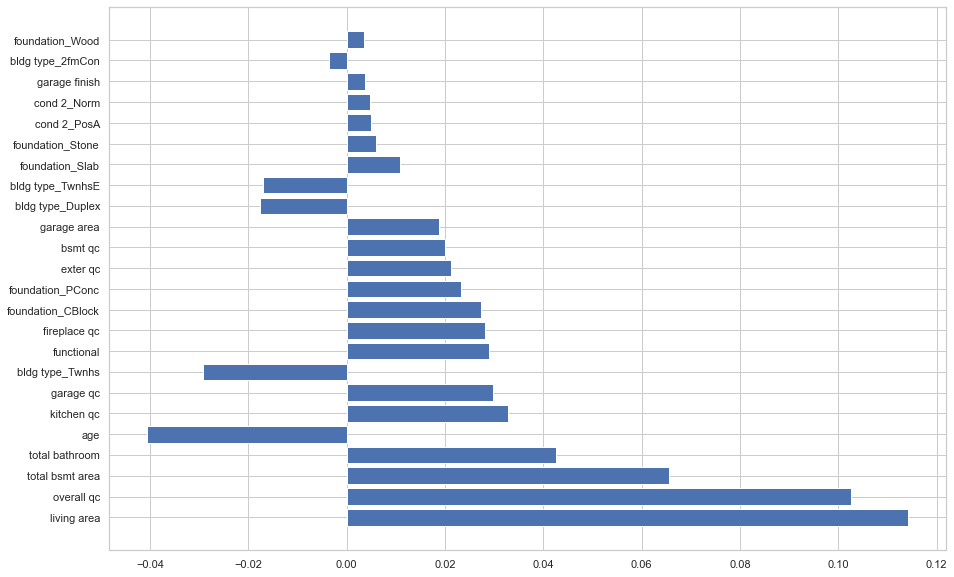

In [76]:
plt.subplots(figsize=(15,10))
plt.barh(ridge_coefs['variable'], ridge_coefs['coef'])

The top 3 important features based on the coefficient are:
- Living Area (With 1 unit, the house sale price increase by 12.1%)
- Overall Quality of the house (With 1 unit, the house sale price increase by 10.8%)
- Basement Area (With 1 unit, the house sale price increase by 6.8%)

We can also observed that age of the house has a bigger negative impact on the house price where a unit of the age will decrease the house sale price by 4%.

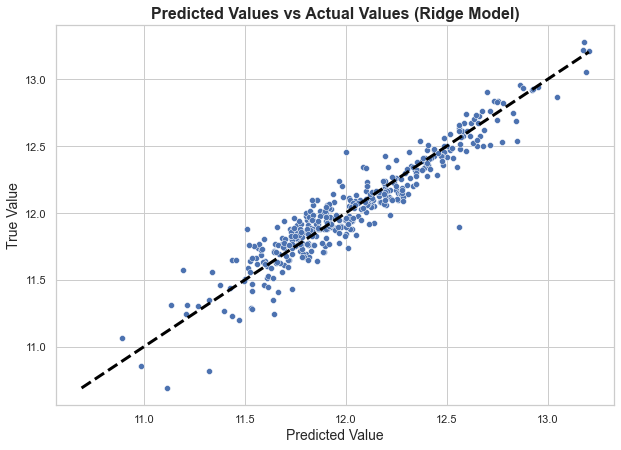

In [77]:
plt.figure(figsize = (10, 7))

# Examine the relationship between observed and predicted values
sns.scatterplot(x = ridge.predict(X_val_log), y = y_val_log)

# Line showing perfect predictions
sns.lineplot(x = [min(y_val_log) ,max(ridge.predict(X_val_log))],
             y = [min(y_val_log) ,max(ridge.predict(X_val_log))],
             color = 'black',
             linewidth = 3,
             linestyle = '--')

plt.title('Predicted Values vs Actual Values (Ridge Model)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Predicted Value', fontsize = 14)
plt.ylabel('True Value', fontsize = 14)

# Save the plot
plt.savefig('../image/predicted vs actual values.png')

The predicted value and true value fit closely to the line with a few outliers observed at the lower and higher price. Overall, the model has a good performance in predicting housing sale price.

## 9. Fitting Model to Test Data

In [78]:
df_test.shape

(878, 24)

In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   living area        878 non-null    int64  
 1   total bsmt area    878 non-null    int64  
 2   garage area        878 non-null    int64  
 3   kitchen qc         878 non-null    int64  
 4   fireplace qc       878 non-null    int64  
 5   bsmt qc            878 non-null    int64  
 6   garage qc          878 non-null    int64  
 7   exter qc           878 non-null    int64  
 8   overall qc         878 non-null    int64  
 9   garage finish      878 non-null    int64  
 10  functional         878 non-null    int64  
 11  total bathroom     878 non-null    float64
 12  age                878 non-null    int64  
 13  cond 2_Norm        878 non-null    uint8  
 14  cond 2_PosA        878 non-null    uint8  
 15  foundation_CBlock  878 non-null    uint8  
 16  foundation_PConc   878

In [80]:
col1 = df_test.columns

In [81]:
col2 = df_train_dummies.columns
col2 = col2[2:]
col2

Index(['living area', 'total bsmt area', 'garage area', 'kitchen qc',
       'fireplace qc', 'bsmt qc', 'garage qc', 'exter qc', 'overall qc',
       'garage finish', 'functional', 'total bathroom', 'age', 'cond 2_Norm',
       'cond 2_PosA', 'foundation_CBlock', 'foundation_PConc',
       'foundation_Slab', 'foundation_Stone', 'foundation_Wood',
       'bldg type_2fmCon', 'bldg type_Duplex', 'bldg type_Twnhs',
       'bldg type_TwnhsE'],
      dtype='object')

In [82]:
len(col1) == len(col2)

True

In [83]:
df_test.head()

living area  total bsmt area  garage area  kitchen qc  fireplace qc  \
id                                                                          
2658         1928             1020          440           3             0   
2718         1967             1967          580           5             0   
2414         1496              654          426           7             7   
1989          968              968          480           5             0   
625          1394             1394          514           5             7   

      bsmt qc  garage qc  exter qc  overall qc  garage finish  functional  \
id                                                                          
2658        3          2         5           6              1           7   
2718        7          5         5           5              3           7   
2414        7          5         7           7              2           7   
1989        5          3         7           5              1           7   
625         7          5         5           6              2           7   

      total bathroom  age  cond 2_Norm  cond 2_PosA  foundation_CBlock  \
id                                                                       
2658             2.0   96            1            0                  0   
2718             2.0   29            1            0                  1   
2414             4.0    0            1            0                  0   
1989             1.0   84            1            0                  1   
625              3.0   46            1            0                  1   

      foundation_PConc  foundation_Slab  foundation_Stone  foundation_Wood  \
id                                                                           
2658                 0                0                 1                0   
2718                 0                0                 0                0   
2414                 1                0                 0                0   
1989                 0                0                 0                0   
625                  0                0                 0                0   

      bldg type_2fmCon  bldg type_Duplex  bldg type_Twnhs  bldg type_TwnhsE  
id                                                                           
2658                 1                 0                0                 0  
2718                 0                 1                0                 0  
2414                 0                 0                0                 0  
1989                 0                 0                0                 0  
625                  0                 0                0                 0

In [84]:
# Transforming df_test dataset
test_scaled = scaler.transform(df_test)

In [85]:
# Predict the df_test dataset
df_test['SalePrice'] = np.exp(ridge.predict(test_scaled)) 
df_submission = df_test[['SalePrice']]

In [86]:
# Reset the index ('ID') to column
df_submission = df_submission.reset_index()

In [87]:
df_submission

id      SalePrice
0    2658  141893.503303
1    2718  179089.667162
2    2414  212264.199717
3    1989  111842.682987
4     625  181529.561538
..    ...            ...
873  1662  196431.153987
874  1234  208401.846848
875  1373  131152.890769
876  1672  107612.230632
877  1939  128858.900898

[878 rows x 2 columns]

In [88]:
# Export data set to csv file
df_submission.to_csv('../datasets/df_submission.csv', index=False)

Submission to Kaggle:
- The df_submission dataset is submitted to Kaggle to check the model performance against other models. This model has a score of 23882.86 (Private score: 22667.86) and rank among the 40s.
- There is still room for improvement for this model.
- Lasso shrink the coefficient for those features that are not significant in the predicting task. Ridge puts a penalty on the l2-norm of your Beta vector which is the square root of the sum of the squared values. Both models controls this penalty with the alpha regularisation parameter. Optimizing alpha is done before the cross validation. We can keep the option of exploring other hyperparameters to see if it will improve the model performance.

## 10. Conclusions and Recommendations

In this analysis, we have explored a housing dataset from the city of Ames in Iowa. From the exploratory data analysis, area, quality and age of the house showed a strong correlation with the housing prices. In addition, we have identified the features, home functionality, type of dwelling and foundation from the visualization. Feature engineering was explored and new features total bathrooms and age have a stronger impact on the house price. 24 features were selected for the modeling.

Linear, Ridge and Lasso regression models are used to predict the housing price. Based on the feature selection and modeling done, Ridge has a better performance than Linear and Lasso. Ridge is adopted and we obtained the below R2 and RSME scores for the training and validation models.

|Model | RSME Score | R2 Score |
|:-----------|:-----------|:-----------|
|Training | 24031.40 | 0.876 |
|Validation | 22770.98 | 0.892 |

From the results, the model is not overfit and has a good performance in predicting the house prices.

Having a bigger living and basement area and good quality of the house can increase the house prices while age of the house decrease the house price. Hence, if a client is looking to sell their house, they should try to do so earlier and highlight if they have a well maintained house. For those buying a house, we can advice them to invest in their renovation budget to maintain the quality of the house as quality is one of the influential factors. In addition, for buyers who are considering to invest in properties, we can advice them to invest in getting houses located in Stone Brook, Northridge Heights and Northridge or a bigger house in terms of the living and basement area and resell it when the house is still young.

For buyers with budget constraint, they may not be able to buy a bigger house and invest in the renovation. However, we can still share the information and help them to keep a lookout on cheaper deal so that they can allocate their budget accordingly based on their preference.


## 11. Future Actions

We can explore fine tuning the model to further improve its performance with hyperparameters (e.g. solver, max_iter). We can consider updating the current dataset with the current year (2011) data so that we can have a better reflection of the housing trend for the year. Further, we may want to examine how we gather data to reduce the amount of missing data (e.g. making a vital consideration variable mandatory) to make the analysis more meaningful and accurate. Finally, the team will conduct a study to determine if new features may affect the sale of a house in the near future as buyer/seller perspectives may change (e.g. younger generations buying houses).